# **Prediction Model: Bike Sharing Provisioning**

## PART I: Exploratory Data Analysis

First, we import necessary packages, open the file and take a look at the first rows:

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

In [ ]:
raw = pd.read_csv('bike-sharing_hourly.csv')

In [ ]:
raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Next, we do some quick data quality check on the variables, verifying that:
* All data types are accurate for the fields
* There are no obvious outliers or erroneous data in the fields
* There are no nulls present in the entire dataset

In [ ]:
raw.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Now we create a copy dataframe to obtain insights. Given the dataset and the questions that the administration of Washington D.C. has for us, we ran the following analysis to better understand customer usage. This includes understanding which conditions favor more participation and some ideas that could benefit potential marketing on behalf of the city.

In [ ]:
eda_df = raw.copy()
#eda_df.head()

In [ ]:
# Features to study:
# How many people use the service varying the atemp
# Casual vs Registered varying by month (maybe some marketing analysis can be done here?)
# Humidity vs usage (weather permitting)
# Month with most 'ideal' days as established by a metric calculated (spin this as something to market a public bike race or something)
# Histogram with most users per hour.
# Weekday vs cnt (box plots, one per dow)
# Cnt vs weather type in box plots

### Insight 1: Usage of service vs variation in feeling temperature
First, we want to understand which conditions are more favorable for our users. This way we can understand what patterns might lead to maximum usage, as well as better forecasting of client surges in the event that we want to be mindful of our supply. In this case, we are looking for which (felt) temperatures tend to bring in more clients. We bin all felt temperatures into groups of 5 degrees (After denormalizing to use known measurements), then build a histogram to see what the curve is. Apparently, the most preferred temperature of our users is between 31 and 35 degrees Celsius to use the bike service.

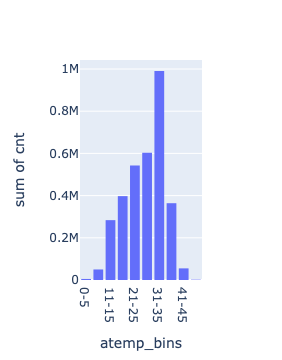

In [ ]:
# First, we denormalize the variable (assuming minimum of 0C° and maximum of 50C°)
eda_df['atemp_denorm'] = [round(i*50) for i in eda_df['atemp']]

# Then, we bin the felt temperatures
eda_df['atemp_bins'] = pd.cut(x=eda_df['atemp_denorm'], bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                              labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

# We continue by plotting how (perceived) temperature affects user count.
atemp_data = eda_df[['cnt', 'atemp_bins']]
atemp_data_hist = px.histogram(atemp_data, x='atemp_bins', y='cnt', category_orders=dict(atemp_bins=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']))
atemp_data_hist

### Insight 2: Casual vs Registered users by month
Up next, we compare usage month-over-month of our users, and we split it between those who use our system casually and those who are registered with us. This give us two insights:
* There is a much larger proportion of registered users as opposed to casual ones
* During high seasons there seems to be more registered users than casual ones from average.

With user registration, we can better provide our services by being able to anonymously track each one across journeys. This would allow us to understand usage patterns better. Not to mention we can launch a marketing initiative to try to incentivize casual users to join the registry during those high season months, as they seem more prone to do so.

<AxesSubplot:xlabel='month_date'>

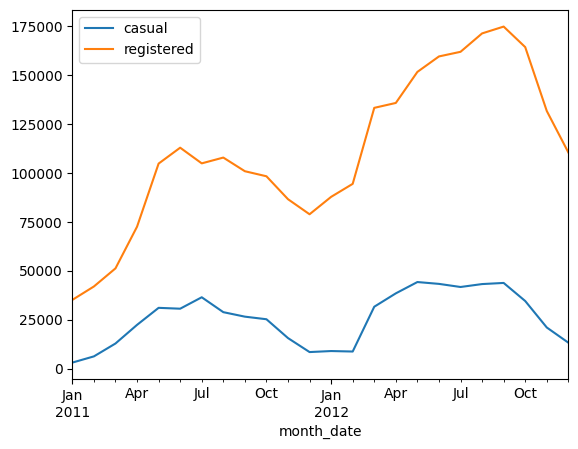

In [ ]:
# First, we create a month field to section by first of month (for both years separately):
eda_df['month_date'] = [pd.to_datetime(str(i)[:8]+'01') for i in eda_df['dteday']]
cas_reg = eda_df[['month_date', 'casual', 'registered']]

# We add up the values per month
cas_reg = cas_reg.groupby('month_date', as_index=False).sum()

# We do a line plot to compare both behaviors over time.
cas_reg.plot(x='month_date', y=['casual', 'registered'])

### Insight 3: Effect of humidity on everyday usage
Is humidity a factor in usage? Do our customers think about this before getting on one of our bikes?
With a correlation coefficient of -.09, the points out that no, the humidity of a given day is not a contributing factor to using our services. 

In [ ]:
# We filter all weather conditions that are logically less than ideal
hum_use = eda_df[eda_df.weathersit <= 2]
hum_use = hum_use[hum_use.season <=2]

# We aggregate by day to obtain average humidity and sum of users for each day
hum_use = hum_use.groupby('dteday').agg(cnt=('cnt', np.sum), hum=('hum', np.mean))

# We run a correlation matrix on humidity and usage
hum_use = hum_use[['cnt', 'hum']]
hum_use.corr()

,cnt,hum
cnt,1.000000,-0.091801
hum,-0.091801,1.000000


### Insight 4: Which month has more 'ideal' days
In order to capture more attention of the general public, we came up with the idea of holding public events to incentivize use of our platform and bikes. a 10k bikeathon would likely be a hit with our users, we believe. The issue with this is that we want to maximize the number of participants that day, and the best way to do so is to setting up an event on a day whose weather is ideal for bikers to join. Since we can't predict the exact weather of a day too much in advance, we identified a metric to establish what a 'good day' is, then count these throughout the years to see which month has the higher probability of giving us a 'good day' for a race.
The metrics to count a day as good are:
* Weather is clear, a little mist allowed
* Felt temperature is between 25 and 35 Celcius, as per our past insight
* Wind speed is under 25
* It is not a working day

Based on our findings, we conclude that the best months for an outdoor event to gather clients would be between June and July. However, data also points to September being acceptable if need be.

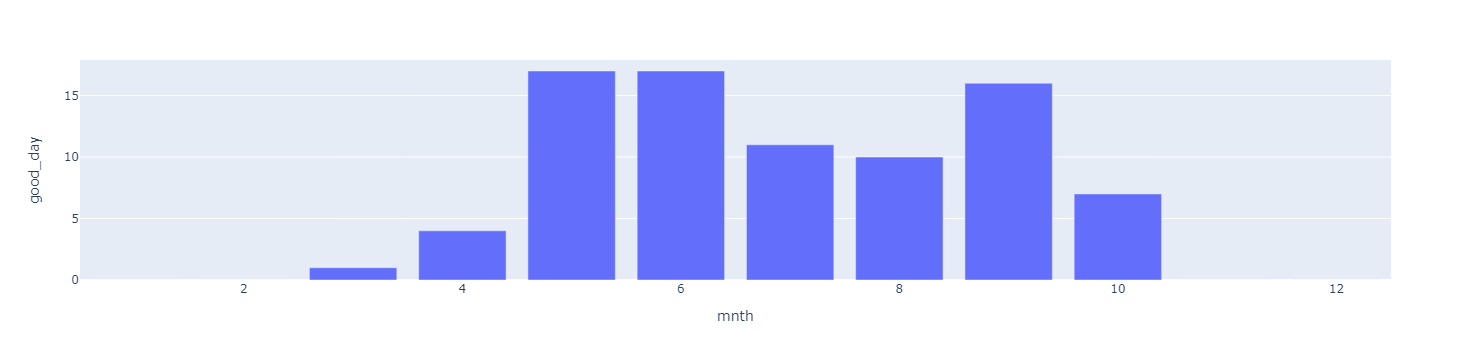

In [ ]:
# First we denormalize wind speed to use it with its normal metric.
eda_df['windspeed_denorm'] = [round(i*67) for i in eda_df['windspeed']]

# Next, we obtain the features we need to qualify a day as 'good', with an average per day.
best_mo = eda_df.groupby(['dteday', 'month_date'], as_index=False).mean()
best_mo = best_mo[['dteday', 'mnth', 'workingday', 'weathersit', 'atemp_denorm', 'windspeed_denorm']]

# We define a function that checks if a given day in the dataset meets the criteria
def good_day(best_mo):
    if ((best_mo['workingday'] < 0.1) and
    (best_mo['weathersit'] < 2.0) and
    (best_mo['atemp_denorm'] >= 25.0) and 
    (best_mo['atemp_denorm'] <= 35.0) and
    (best_mo['windspeed_denorm'] <= 25.0)):
        return 1
    else:
        return 0

# We apply the formula and obtain the aggregate of good days by month
best_mo['good_day'] = best_mo.apply(good_day, axis=1)
best_mo = best_mo.groupby('mnth', as_index=False).sum()
best_mo['mnth'] = best_mo['mnth'].astype(int)

# Lastly, we plot the graph
best_mo_hist = px.bar(best_mo, x='mnth', y='good_day')
best_mo_hist

### Insight 5: Users per hour
By building a histogram that plots users by hour, we can see a clear bimodal curve. This shows that most users come to our services around 8 in the morning and around 5-6 in the afternoon. This makes perfect sense considering that those are the rush hour times. Perhaps our clients want to avoid car traffic, or they believe this is to be a healthier or greener alternative to driving. Either way, with this information at hand we can likely come up with some marketing scheme, where we give a subscription to users in exchange to reduced rates at peak times or something of the matter. 

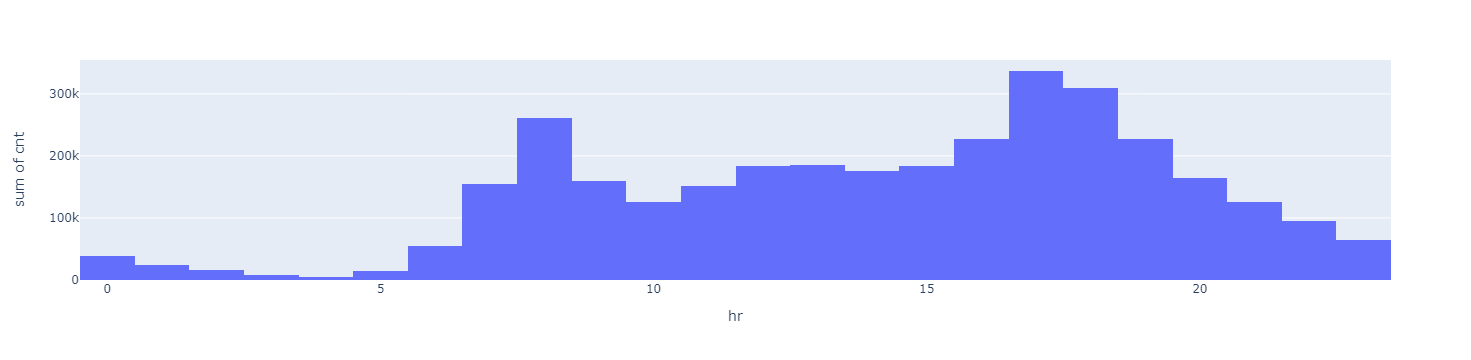

In [ ]:
# We plot both variables together
hour_users_hist = px.histogram(eda_df, x='hr', y='cnt')
hour_users_hist

### Insight 6: Day of Week vs usage
We wanted to better understand if a given day of week had more general use than another. For context, are our clients using our services more during leisure on the weekends, or is the service more used to commute to work? Turns out this is a little inconclusive, as the behavior between days doesn't vary by a large enough amount to be able to claim so. There seems to be some grater variance in use on the weekends; however, the means are close enough for us to be able to say that there is no discernable pattern across days of week.

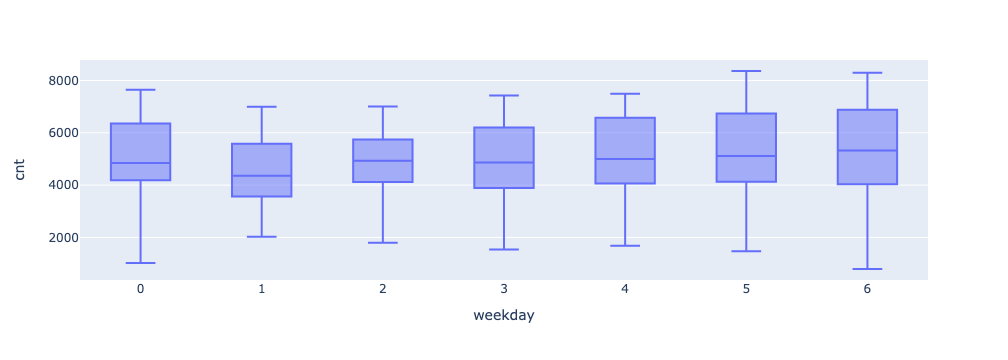

In [ ]:
# First, we filter to only evaluate the Summer, which is our most active season.
dow_use = eda_df[eda_df['season']==2]

# We aggregate usage by day of week
dow_use = dow_use.groupby(['dteday', 'weekday'], as_index=False).sum()

# We display the box plot
dow_use_box = px.box(dow_use, x='weekday', y='cnt')
dow_use_box

### Insight 7: Weather type vs usage
While this makes logical sense, we wanted to see by what amounts are our customers stopping using our services as weather gets progressively worse. As evidenced in the data in our graph below, there is very little participation when the weather is in a bad shape. However, it is interesting to note that misty days have a definitively smaller amount of customers than one with a fully cleared day. Mist doesn't exactly affect the biking experience, so perhaps this is psychological behavior. Maybe it would be an interesting proposition to study offering discounts in misty days so we can incentivize use instead of seeing the potential go to waste.

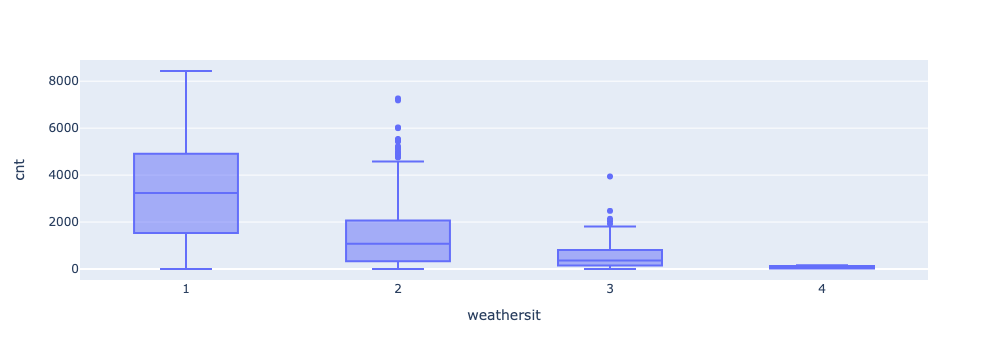

In [ ]:
# First we aggregate the count of users by day and weather conditions to see how they stack against each other
weather_use = eda_df.groupby(['dteday', 'weathersit'], as_index=False).sum()

# Lastly we plot the box plot.
weather_use_box = px.box(weather_use, x='weathersit', y='cnt')
weather_use_box

## PART II: Prediction Model

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import data
data = pd.read_csv("bike-sharing_hourly.csv")
data.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
hr,0,1,2,3,4
holiday,0,0,0,0,0
weekday,6,6,6,6,6
workingday,0,0,0,0,0
weathersit,1,1,1,1,1


In [ ]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### To make the data more readable and for better interpretability, we map the categorical variables to the specified definitions

In [ ]:
#Map variables to definition
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['yr'] = data['yr'].map({0:2011, 1:2012})
data['mnth'] = data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data['holiday'] = data['holiday'].map({0:'No', 1:'Yes'})
data['weekday'] = data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
data['workingday'] = data['workingday'].map({0:'No', 1:'Yes'})
data['weathersit'] = data['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

#### Since <em>hr</em> has 24 unique values, its better to bin this field

In [ ]:
#Bin hr into 4 categories: Late Night/Early Morning, Morning, Afternoon/Evening, Night
def bin_hr(hr):
    if hr >= 0 and hr < 6:
        return 'Late Night/Early Morning'
    elif hr >= 6 and hr < 12:
        return 'Morning'
    elif hr >= 12 and hr < 18:
        return 'Afternoon/Evening'
    else:
        return 'Night'

data['hr_cat'] = data['hr'].apply(bin_hr)

In [ ]:
data.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,spring,spring,spring,spring,spring
yr,2011,2011,2011,2011,2011
mnth,Jan,Jan,Jan,Jan,Jan
hr,0,1,2,3,4
holiday,No,No,No,No,No
weekday,Sat,Sat,Sat,Sat,Sat
workingday,No,No,No,No,No
weathersit,Clear,Clear,Clear,Clear,Clear


#### We want to check if there is any pronounced difference between <em>registered</em> and <em>casual</em> users. This will help us decide if we should build separate predictive models for this dataset or just build a single predictive model keeping <em>cnt</em> as the target variable

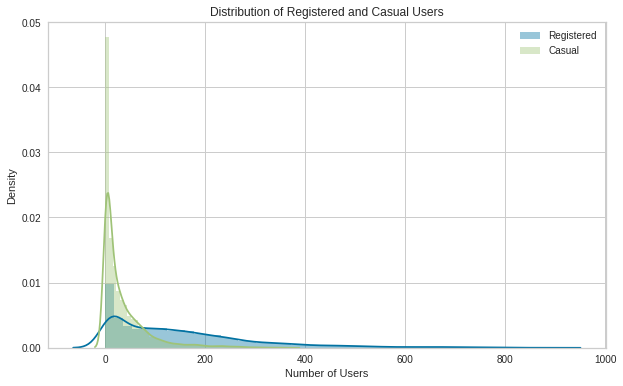

In [ ]:
#Plot distribution of registered and casual users
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['registered'], ax=ax, label='Registered')
sns.distplot(data['casual'], ax=ax, label='Casual')
#sns.distplot(data['cnt'], ax=ax, label='Total')
ax.set_title('Distribution of Registered and Casual Users')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Density')
ax.legend()
plt.show()

#### The distribution of users is right-skewed. This implies that a transformation might be needed to make the distribution more normal.
#### For further clarity, we also check the proportion of casual users vs. registered users

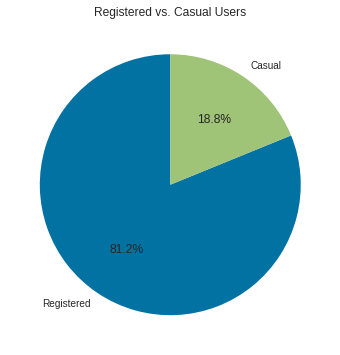

In [ ]:
#Pie chart of registered and casual users
fig, ax = plt.subplots(figsize=(10,6))
labels = ['Registered', 'Casual']
ax.pie(data[['registered', 'casual']].sum(), labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Registered vs. Casual Users')
plt.show()

In [ ]:
#Export data for PyCaret
data.to_csv("bike_pycaret.csv", index = False)

#### Deciding between <em>temp</em> and <em>atemp</em>, <em>mnth</em> and <em>season</em>

In [ ]:
data2 = data.copy()
data2 = data2.drop(['instant', 'dteday', 'hr'], axis = 1)

In [ ]:
cat_var = data2.select_dtypes(include = ['object']).columns

In [ ]:
data2 = pd.get_dummies(data2, columns = cat_var, drop_first = False)

In [ ]:
data2.corr()['casual'].abs().sort_values(ascending = False)

casual                             1.000000
cnt                                0.694564
registered                         0.506618
temp                               0.459616
atemp                              0.454080
hr_cat_Afternoon/Evening           0.441259
hr_cat_Late Night/Early Morning    0.361136
hum                                0.347028
workingday_No                      0.300942
workingday_Yes                     0.300942
season_spring                      0.246476
weekday_Sat                        0.213187
season_fall                        0.175067
weekday_Sun                        0.170408
mnth_Jan                           0.165430
mnth_Feb                           0.143796
yr                                 0.142779
weathersit_Clear                   0.136596
mnth_Dec                           0.130397
season_summer                      0.123983
weathersit_Light Snow              0.118661
mnth_Jul                           0.104571
weekday_Wed                     

In [ ]:
data2.corr()['registered'].abs().sort_values(ascending = False)

registered                         1.000000
cnt                                0.972151
casual                             0.506618
hr_cat_Late Night/Early Morning    0.503446
temp                               0.335361
atemp                              0.332559
hum                                0.273933
hr_cat_Afternoon/Evening           0.262563
yr                                 0.253684
season_spring                      0.213866
hr_cat_Night                       0.140362
workingday_Yes                     0.134326
workingday_No                      0.134326
mnth_Jan                           0.134061
season_fall                        0.124675
weathersit_Light Snow              0.114783
mnth_Feb                           0.099499
hr_cat_Morning                     0.096869
weathersit_Clear                   0.096290
weekday_Sun                        0.088010
windspeed                          0.082321
mnth_Sep                           0.075476
mnth_Aug                        

## Minimum Viable Model: Random Forest Regression

#### To deal with the skewness, we decide to try transforming the target variables <em>casual</em> and <em>registered</em>
#### Using *FunctionTransformer* from *sklearn*, we define a log transform for the target while defining the inverse transform (exponential) function for when we make the predictions

In [ ]:
#Define FunctionTransformer from sklearn.preprocessing to transform data
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

#### We decide to drop a few features carrying irrelevant (to predict total users) information or similar information as other features from the input features set: X
##### <em>temp</em> gives the actual temperature of the day and that has a bigger influence than <em>atemp</em>
##### <em>season</em> is just a categorised version of <em>mnth</em> and opting for it could help our model perform better
##### All this is verified by the above correlation analysis

In [ ]:
#Create two X and y sets: X_cas and y_cas for casual users and X_reg and y_reg for registered users
X_cas = data.drop(['instant', 'cnt', 'casual', 'registered', 'dteday', 'hr', 'atemp', 'mnth'], axis = 1)
y_cas = data[['casual']]

X_reg = data.drop(['instant', 'cnt', 'casual', 'registered', 'dteday', 'hr', 'atemp', 'mnth'], axis = 1)
y_reg = data[['registered']]

#### We dummy encode the categorical variables

In [ ]:
#Extract categorical variables
cat_var = X_cas.select_dtypes(include = ['object']).columns

In [ ]:
#Dummy encode categorical variables
X_cas = pd.get_dummies(X_cas, columns = cat_var, drop_first = True)
X_reg = pd.get_dummies(X_reg, columns = cat_var, drop_first = True)

#### Using *Recursive Feature Elimination*, we also decide to extract the most important features for our MVM

In [ ]:
#Recursive Feature Selection 
from sklearn.feature_selection import RFE

NUM_FEATURES = 5
model = RandomForestRegressor()

rfe_stand = RFE(model, step=NUM_FEATURES)

In [ ]:
fit_stand1 = rfe_stand.fit(X_cas, y_cas)
fit_stand2 = rfe_stand.fit(X_reg, y_reg)

print("Cas: Std Model Feature Ranking:", fit_stand1.ranking_)
print("Reg: Std Model Feature Ranking:", fit_stand2.ranking_)

# calculate the score for the selected features
score_stand1 = rfe_stand.score(X_cas, y_cas)
print("Cas: Standardized Model Score with selected features is: %f (%f)" % (score_stand1.mean(), score_stand1.std()))

score_stand2 = rfe_stand.score(X_reg, y_reg)
print("Reg: Standardized Model Score with selected features is: %f (%f)" % (score_stand2.mean(), score_stand2.std()))

Cas: Std Model Feature Ranking: [1 1 1 1 2 4 1 4 3 4 4 3 3 3 1 4 3 1 1 1 1]
Reg: Std Model Feature Ranking: [1 1 1 1 2 4 1 4 3 4 4 3 3 3 1 4 3 1 1 1 1]
Cas: Standardized Model Score with selected features is: -10.168658 (0.000000)
Reg: Standardized Model Score with selected features is: 0.903461 (0.000000)


In [ ]:
train_names1 = np.array(X_cas.columns)
print('Cas: Most important features (RFE): %s'% train_names1[rfe_stand.support_])

train_names2 = np.array(X_reg.columns)
print('Reg: Most important features (RFE): %s'% train_names2[rfe_stand.support_])

Cas: Most important features (RFE): ['yr' 'temp' 'hum' 'windspeed' 'season_winter' 'workingday_Yes'
 'weathersit_Mist' 'hr_cat_Late Night/Early Morning' 'hr_cat_Morning'
 'hr_cat_Night']
Reg: Most important features (RFE): ['yr' 'temp' 'hum' 'windspeed' 'season_winter' 'workingday_Yes'
 'weathersit_Mist' 'hr_cat_Late Night/Early Morning' 'hr_cat_Morning'
 'hr_cat_Night']


#### While most important features appear to be the same for this given dataset, this may change over time. So we proceed with the creation of two different <em>X_imp_</em>

In [ ]:
X_imp_cas = X_cas[train_names1[rfe_stand.support_]]
X_imp_reg = X_reg[train_names2[rfe_stand.support_]]

In [ ]:
#Select numeric variables
num_var = X_imp_cas.select_dtypes(include = ['int64', 'float64']).columns

#### Splitting data into train and test with X_imp
##### Running the model only with important features will help the runtime as this is just to set a baseline

In [ ]:
#Split data into train and test
X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(X_imp_cas, y_cas, test_size = 0.2, random_state = 42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_imp_reg, y_reg, test_size = 0.2, random_state = 42)

X_train_cas.shape, X_test_cas.shape, y_train_cas.shape, y_test_cas.shape

((13903, 10), (3476, 10), (13903, 1), (3476, 1))

#### We use *MinMaxScaler* to scale only the numerical features

In [ ]:
#Scale numeric variables for train and test
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_cas[num_var] = scaler.fit_transform(X_train_cas[num_var])
X_train_cas = pd.DataFrame(X_train_cas, columns=X_train_cas.columns)
X_test_cas[num_var] = scaler.transform(X_test_cas[num_var])
X_test_cas = pd.DataFrame(X_test_cas, columns=X_test_cas.columns)

X_train_reg[num_var] = scaler.fit_transform(X_train_reg[num_var])
X_train_reg = pd.DataFrame(X_train_reg, columns=X_train_reg.columns)
X_test_reg[num_var] = scaler.transform(X_test_reg[num_var])
X_test_reg = pd.DataFrame(X_test_reg, columns=X_test_reg.columns)

#### Target transforming the target variables

In [ ]:
#Log transform y
y_train_cas = transformer.fit_transform(y_train_cas.values.reshape(-1,1))
y_train_cas = pd.DataFrame(y_train_cas)

y_train_reg = transformer.fit_transform(y_train_reg.values.reshape(-1,1))
y_train_reg = pd.DataFrame(y_train_reg)

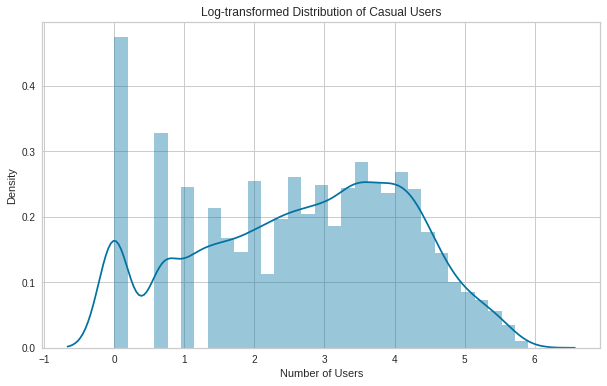

In [ ]:
#Plot log-transformed distribution of casual users
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(y_train_cas, ax=ax)
ax.set_title('Log-transformed Distribution of Casual Users')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Density')
plt.show()

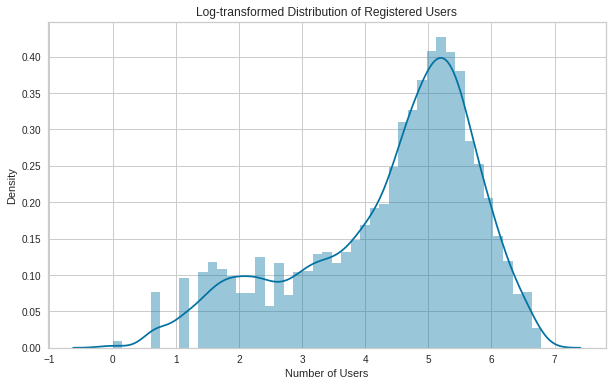

In [ ]:
#Plot log-transformed distribution of registered users
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(y_train_reg, ax=ax)
ax.set_title('Log-transformed Distribution of Registered Users')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Density')
plt.show()

In [ ]:
#Log transform y
y_test_cas = transformer.transform(y_test_cas.values.reshape(-1,1))
y_test_cas = pd.DataFrame(y_test_cas)

y_test_reg = transformer.transform(y_test_reg.values.reshape(-1,1))
y_test_reg = pd.DataFrame(y_test_reg)

#### Fitting the model

In [ ]:
#Define Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_cas = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Fit model
rf_cas.fit(X_train_cas, y_train_cas)
rf_reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Inverse transforming y to calculate MAE

In [ ]:
#Calculate MAE for casual users
y_pred_cas = rf_cas.predict(X_test_cas)
y_pred_cas = pd.DataFrame(y_pred_cas)
y_pred_cas = transformer.inverse_transform(y_pred_cas.values.reshape(-1,1))

y_te_inv1 = transformer.inverse_transform(y_test_cas.values.reshape(-1,1))
y_te_inv1 = pd.DataFrame(y_te_inv1)

print("Test score (MAE): ", round(mean_absolute_error(y_te_inv1,y_pred_cas),3))

Test score (MAE):  12.615


In [ ]:
#Calculate MAE for registered users
y_pred_reg = rf_reg.predict(X_test_reg)
y_pred_reg = pd.DataFrame(y_pred_reg)
y_pred_reg = transformer.inverse_transform(y_pred_reg.values.reshape(-1,1))

y_te_inv2 = transformer.inverse_transform(y_test_reg.values.reshape(-1,1))
y_te_inv2 = pd.DataFrame(y_te_inv2)

print("Test score (MAE): ", round(mean_absolute_error(y_te_inv2,y_pred_reg),3))

Test score (MAE):  64.006


In [ ]:
#Calculate MAE for total users
y_pred = pd.concat([y_te_inv1, y_te_inv2])

#Get total users from original data
df_cnt = data[['cnt']]
df_cnt = df_cnt.iloc[-len(y_pred):]

print("Test score (MAE): ", round(mean_absolute_error(df_cnt,y_pred),3))

Test score (MAE):  228.173


### MVM: Hyperparameter tuning

In [ ]:
#Create a parameter grid
grid = {'max_features': [range(1,len(X_cas.columns)), 'sqrt'], 'max_depth': range(1, 40, 5)}

#Create grid search object
from sklearn.model_selection import GridSearchCV

grid_search_cas = GridSearchCV(estimator = rf_cas, param_grid = grid, cv = 10)
grid_search_reg = GridSearchCV(estimator = rf_reg, param_grid = grid, cv = 10)

#Fit grid search
grid_search_cas.fit(X_train_cas, y_train_cas)
grid_search_reg.fit(X_train_reg, y_train_reg)

#Print best parameters
print(grid_search_cas.best_params_)
print(grid_search_reg.best_params_)

{'max_depth': 11, 'max_features': 'sqrt'}
{'max_depth': 11, 'max_features': 'sqrt'}


In [ ]:
#Define Random Forest Regressor with best parameters
rf_cas_tuned = RandomForestRegressor(max_features=grid_search_cas.best_params_['max_features'], max_depth=grid_search_cas.best_params_['max_depth'], random_state = 42)
rf_reg_tuned = RandomForestRegressor(max_features=grid_search_reg.best_params_['max_features'], max_depth=grid_search_reg.best_params_['max_depth'], random_state = 42)

#Fit model
rf_cas_tuned.fit(X_train_cas, y_train_cas)
rf_reg_tuned.fit(X_train_reg, y_train_reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#Calculate MAE for casual users
y_pred_cas = rf_cas_tuned.predict(X_test_cas)
y_pred_cas = pd.DataFrame(y_pred_cas)
y_pred_cas = transformer.inverse_transform(y_pred_cas.values.reshape(-1,1))

y_te_inv1 = transformer.inverse_transform(y_test_cas.values.reshape(-1,1))

print("Test score (MAE): ", round(mean_absolute_error(y_te_inv1,y_pred_cas),3))

Test score (MAE):  13.393


In [ ]:
#Calculate MAE for registered users
y_pred_reg = rf_reg_tuned.predict(X_test_reg)
y_pred_reg = pd.DataFrame(y_pred_reg)
y_pred_reg = transformer.inverse_transform(y_pred_reg.values.reshape(-1,1))

y_te_inv2 = transformer.inverse_transform(y_test_reg.values.reshape(-1,1))

print("Test score (MAE): ", round(mean_absolute_error(y_te_inv2,y_pred_reg),3))

Test score (MAE):  63.199


In [ ]:
#Calculate MAE for total users
y_pred = y_te_inv1 + y_te_inv2

#Get total users from original data
df_cnt = data[['cnt']]
df_cnt = df_cnt.iloc[-len(y_pred):]

print("Test score (MAE): ", round(mean_absolute_error(df_cnt,y_pred),3))

Test score (MAE):  222.381


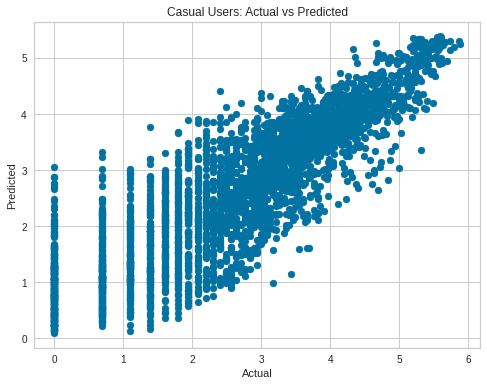

In [ ]:
#Plot predicted vs actual
y_pred_cas = rf_cas_tuned.predict(X_test_cas)

plt.figure(figsize = (8, 6))
plt.scatter(y_test_cas, y_pred_cas)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Casual Users: Actual vs Predicted')
plt.show()

#### From the plot, we can see that the model is performing well for casual users when the actual values are greater than 2

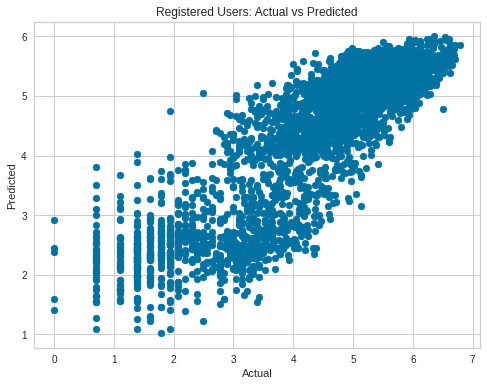

In [ ]:
#Plot predicted vs actual
y_pred_reg = rf_reg_tuned.predict(X_test_reg)

plt.figure(figsize = (8, 6))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Registered Users: Actual vs Predicted')
plt.show()

#### The same goes for registered users

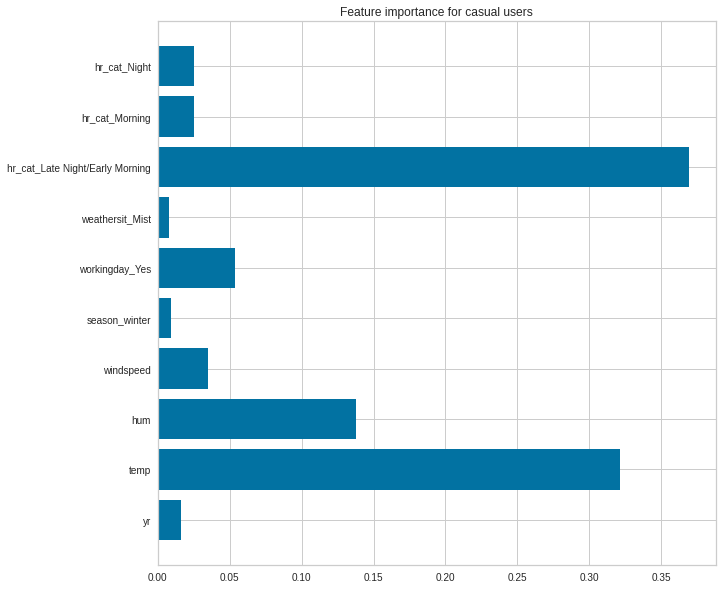

In [ ]:
#Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.barh(X_train_cas.columns, rf_cas_tuned.feature_importances_)
plt.title('Feature importance for casual users')
plt.show()

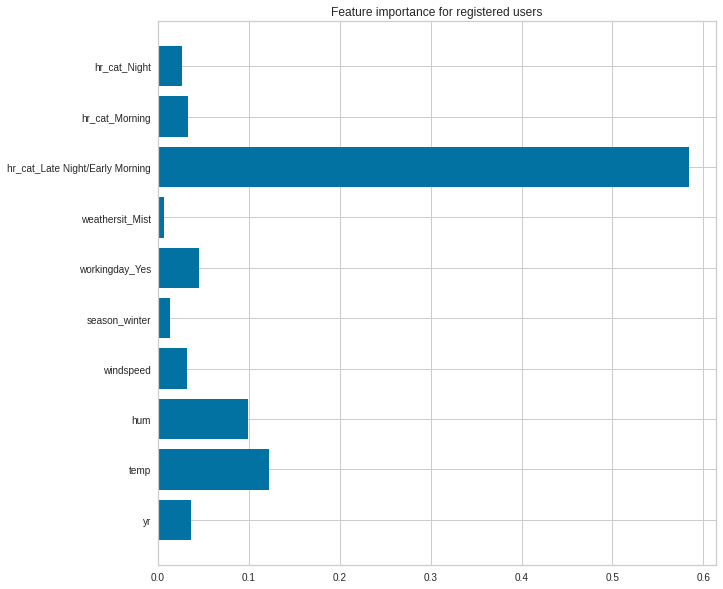

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(X_train_reg.columns, rf_reg_tuned.feature_importances_)
plt.title('Feature importance for registered users')
plt.show()

#### On comparing the two feature importance plots, we can see that the most important features for casual users are temp, humidity, and windspeed. For registered users, this feature importance is less pronounced. We can thus conclude that casual users seem to be taking more rides depending on the weather conditions, while registered users are more likely to take rides irrespective of the weather conditions.

## PyCaret: Predict *casual* and *registered* separately

#### PyCaret is an easier and faster way to build machine learning models and will allow us to compare the performance of different models, keeping the observations from the MVM models in mind. We will use PyCaret to predict casual and registered users separately.

In [ ]:
from pycaret.regression import *
import xgboost
import catboost

In [ ]:
#Import data
df = pd.read_csv("bike_pycaret.csv")
df.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,spring,spring,spring,spring,spring
yr,2011,2011,2011,2011,2011
mnth,Jan,Jan,Jan,Jan,Jan
hr,0,1,2,3,4
holiday,No,No,No,No,No
weekday,Sat,Sat,Sat,Sat,Sat
workingday,No,No,No,No,No
weathersit,Clear,Clear,Clear,Clear,Clear


#### We will be testing our predictive models on the same test dataset in order to compare the results.
#### We will also try to build a predictive model only for <em>cnt</em> and compare the results.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (15641, 18)
Unseen Data For Predictions (1738, 18)


### Casual users

1. We do a similar test-train split as the MVM
    
2. We remove outliers at 5%
    
3. We ignore the same features as before
    
4. Feature normalization and transformation is set to True
    
5. Feature selections takes too long so we disable it
    
6. We set thresholds for multicollinearity

In [ ]:
model = setup(

    # Basic options
    data = data,
    target = "casual",
    train_size = 0.8,

    preprocess = True,
    
    remove_outliers = True,
    outliers_threshold = 0.05,

    ignore_features = ['instant', 'registered', 'cnt', 'dteday', 'atemp', 'hr', 'mnth'],
    
    #bin_numeric_features = ['atemp', 'hum', 'windspeed'],
    
    # Feature normalization
    normalize = True,
    normalize_method = 'zscore',
    transformation = True, 
    transform_target = True,
    transform_target_method = 'yeo-johnson', #To deal with rows with value as 0
    
    # Dealing with collinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.8,
    remove_perfect_collinearity = True,
    
    #feature_selection = True,

    # Cross-validation settings
    data_split_shuffle = True,
    data_split_stratify = False,
    fold_strategy = 'stratifiedkfold',
    fold = 5,
    fold_shuffle = False,
    fold_groups = None,


    # Paralellization options
    n_jobs = -1,
    use_gpu = False,

    # MLFlow experiments registry
    log_experiment = True,
    experiment_name = "bike_casual"
)

,Description,Value
0,session_id,4496
1,Target,casual
2,Original Data,"(15641, 18)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11886, 23)"


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['instant', 'registered',
                                                       'cnt', 'dteday', 'atemp',
                                                       'hr', 'mnth'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='casual',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_cat...
                ('dummy', Dummify(target='casual')),
      

We decide to ignore the same features as the ones we dropped in the MVM

In [ ]:
models = compare_models(exclude = ['ransac'], n_select = 3, fold = 5, sort = "MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,12.0748,443.9956,21.0671,0.8214,0.6772,0.6817,2.770
rf,Random Forest Regressor,12.1466,443.7232,21.0619,0.8215,0.7011,0.7015,2.608
lightgbm,Light Gradient Boosting Machine,12.1937,454.5656,21.3189,0.8171,0.6785,0.6834,0.404
et,Extra Trees Regressor,12.3040,440.4107,20.9838,0.8228,0.7340,0.7451,2.482
xgboost,Extreme Gradient Boosting,12.3391,460.8391,21.4594,0.8146,0.6982,0.7061,1.490
gbr,Gradient Boosting Regressor,13.0649,544.8161,23.3410,0.7808,0.6943,0.7161,0.722
knn,K Neighbors Regressor,13.7432,571.6618,23.9028,0.7700,0.7583,0.8173,0.370
dt,Decision Tree Regressor,15.7911,731.2040,27.0381,0.7058,0.9266,1.0262,0.098
huber,Huber Regressor,16.8009,966.4236,31.0795,0.6113,0.7697,0.9310,0.126
lar,Least Angle Regression,17.0162,1012.9497,31.8207,0.5926,0.7647,0.8757,0.092


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=4496,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1da4e5910>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fr

### Create

In [ ]:
model_cas = create_model('catboost', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.30,461.42,21.48,0.81,0.68,0.68
1,11.54,399.26,19.98,0.84,0.65,0.64
2,12.45,473.38,21.76,0.81,0.69,0.68
3,11.33,406.43,20.16,0.84,0.65,0.63
4,12.72,490.28,22.14,0.79,0.69,0.72
5,11.87,424.80,20.61,0.83,0.66,0.69
6,12.27,470.84,21.70,0.81,0.69,0.68
7,11.81,410.59,20.26,0.84,0.67,0.70
8,11.41,382.68,19.56,0.84,0.67,0.67


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=4496,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1da4eef50>,
                                task_type='CPU', verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
model_cas_2 = create_model('rf', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.48,459.78,21.44,0.81,0.70,0.72
1,11.36,352.48,18.77,0.86,0.67,0.68
2,12.50,484.88,22.02,0.81,0.71,0.71
3,11.26,401.40,20.04,0.84,0.65,0.62
4,12.95,496.66,22.29,0.78,0.72,0.75
5,11.93,466.61,21.60,0.81,0.68,0.71
6,12.27,468.71,21.65,0.82,0.70,0.69
7,11.55,392.15,19.80,0.84,0.67,0.70
8,11.73,396.83,19.92,0.84,0.71,0.67


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='yeo-johnson',
                                p...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                crit

#### CATBoost is outperforming Random Forest

### Tune

In [ ]:
tuned_cas = tune_model(model_cas, optimize = 'MAE', fold = 10, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.0606,455.8613,21.3509,0.8147,0.6868,0.6835
1,11.4785,406.6528,20.1656,0.8365,0.6612,0.6429
2,12.5309,484.0033,22.0001,0.8087,0.6969,0.6899
3,11.4881,423.2668,20.5734,0.8331,0.6455,0.6269
4,12.8059,493.3843,22.2123,0.7847,0.6929,0.7178
5,11.9363,437.3632,20.9132,0.8256,0.6646,0.6946
6,12.3408,493.4124,22.2129,0.8054,0.6982,0.6994
7,11.7185,421.8447,20.5389,0.8326,0.6653,0.6695
8,11.5803,367.7735,19.1774,0.8488,0.6716,0.6680


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 5
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=4496,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1da672dd0>,
                                task_type='CPU', verbose=False)
INFO:logs:tune_model() succesfully completed......................................


### Bagging

In [ ]:
bagged_cas = ensemble_model(model_cas, fold = 10, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.3760,462.7364,21.5113,0.8119,0.6851,0.6835
1,11.5790,404.3795,20.1092,0.8374,0.6547,0.6411
2,12.4837,474.4821,21.7826,0.8125,0.6882,0.6771
3,11.3482,408.1396,20.2025,0.8390,0.6419,0.6242
4,12.7389,491.3750,22.1670,0.7856,0.6889,0.7210
5,11.8256,417.3314,20.4287,0.8336,0.6586,0.6890
6,12.2595,473.2146,21.7535,0.8134,0.6846,0.6799
7,11.8304,415.5005,20.3838,0.8351,0.6720,0.7017
8,11.3874,384.1172,19.5989,0.8421,0.6683,0.6643


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 6
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=4496,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1da672510>,
                                task_type='CPU', verbose=False)
INFO:logs:ensemble_model() succesfully completed......................................


### Stacking

In [ ]:
stacked_cas = stack_models(models, fold = 10, meta_model = model_cas, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.1337,438.8141,20.9479,0.8217,0.6875,0.6905
1,11.5421,382.9231,19.5684,0.8460,0.6660,0.6471
2,12.6233,484.8411,22.0191,0.8084,0.6955,0.6891
3,11.0948,382.1207,19.5479,0.8493,0.6490,0.6318
4,12.5950,470.4703,21.6903,0.7947,0.6919,0.7266
5,11.6271,416.2174,20.4014,0.8340,0.6693,0.7007
6,12.0854,456.9055,21.3753,0.8198,0.6858,0.6747
7,11.4512,381.4877,19.5317,0.8486,0.6751,0.7093
8,11.4815,365.6132,19.1210,0.8497,0.6840,0.6790


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 7
INFO:logs:PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fe1e13bad50>),
                                            ('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=None,
                                                                   max_features='auto',
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                        

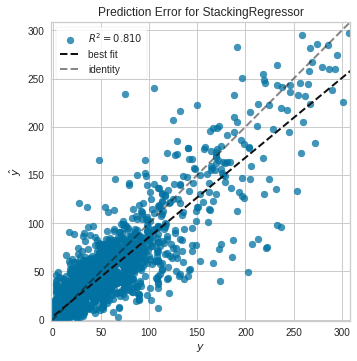

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(stacked_cas, plot = 'error')

### Predict on unseen data

In [ ]:
unseen_predictions = predict_model(stacked_cas, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fe1e13bad50>),
                                            ('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=None,
                                                                   max_features='auto',
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_de

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,11.8144,436.606,20.8951,0.8134,0.6836,0.6415


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_cat,Label
0,2,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40,Late Night/Early Morning,1.913726
1,6,2011-01-01,spring,2011,Jan,5,No,Sat,No,Mist,0.24,0.2576,0.75,0.0896,0,1,1,Late Night/Early Morning,0.920517
2,9,2011-01-01,spring,2011,Jan,8,No,Sat,No,Clear,0.24,0.2879,0.75,0.0000,1,7,8,Morning,3.131698
3,13,2011-01-01,spring,2011,Jan,12,No,Sat,No,Clear,0.42,0.4242,0.77,0.2836,29,55,84,Afternoon/Evening,38.554168
4,19,2011-01-01,spring,2011,Jan,18,No,Sat,No,Light Snow,0.42,0.4242,0.88,0.2537,9,26,35,Night,5.207053


In [ ]:
unseen_predictions = unseen_predictions.rename(columns={"Label": "Pred_cas"})
unseen_predictions['Pred_cas'] = unseen_predictions['Pred_cas'].astype('int')

### Registered users

In [ ]:
model = setup(

    # Basic options
    data = data,
    target = "registered",
    train_size = 0.8,

    preprocess = True,
    
    remove_outliers = True,
    outliers_threshold = 0.05,

    ignore_features = ['instant', 'casual', 'cnt', 'dteday', 'atemp', 'hr', 'mnth'],
    
    #bin_numeric_features = ['atemp', 'hum', 'windspeed'],
    
    # Feature normalization
    normalize = True,
    normalize_method = 'zscore',
    transformation = True, 
    transform_target = True,
    transform_target_method = 'yeo-johnson', #To deal with rows with value as 0

    # Dealing with collinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.8,
    remove_perfect_collinearity = True,
    
    #feature_selection = True,

    # Cross-validation settings
    data_split_shuffle = True,
    data_split_stratify = False,
    fold_strategy = 'stratifiedkfold',
    fold = 5,
    fold_shuffle = False,
    fold_groups = None,


    # Paralellization options
    n_jobs = -1,
    use_gpu = False,

    # MLFlow experiments registry
    log_experiment = True,
    experiment_name = "bike_registered"
)

,Description,Value
0,session_id,1002
1,Target,registered
2,Original Data,"(15641, 18)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11886, 23)"


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['instant', 'casual',
                                                       'cnt', 'dteday', 'atemp',
                                                       'hr', 'mnth'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='registered', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_cat...
                ('dummy', Dummify(target='registered')),
  

In [ ]:
models = compare_models(exclude = ['ransac'], n_select = 3, fold = 5, sort = "MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,63.6384,10548.1615,102.6848,0.5409,0.6741,0.7752,2.538
lightgbm,Light Gradient Boosting Machine,64.6346,10766.3058,103.7420,0.5314,0.6775,0.7975,0.182
xgboost,Extreme Gradient Boosting,65.3606,11015.3064,104.9310,0.5206,0.6998,0.8090,1.462
rf,Random Forest Regressor,65.5905,11277.8310,106.1708,0.5092,0.7007,0.8116,2.672
gbr,Gradient Boosting Regressor,66.8152,11396.0080,106.7445,0.5039,0.6907,0.8380,0.746
et,Extra Trees Regressor,68.0065,12266.2581,110.7487,0.4660,0.7396,0.8386,2.488
knn,K Neighbors Regressor,69.4924,12341.2297,111.0734,0.4628,0.7415,0.8963,0.356
huber,Huber Regressor,71.2973,13826.5053,117.5760,0.3981,0.7860,0.9558,0.140
br,Bayesian Ridge,72.0377,13051.2728,114.2334,0.4319,0.8005,1.0164,0.072
ridge,Ridge Regression,72.0404,13048.1316,114.2197,0.4320,0.8006,1.0159,0.066


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1de120050>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
               

### Create

In [ ]:
model_reg = create_model('catboost', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.86,11189.06,105.78,0.52,0.67,0.75
1,63.72,10205.14,101.02,0.55,0.70,0.84
2,63.81,10451.67,102.23,0.55,0.67,0.75
3,62.96,10237.63,101.18,0.55,0.68,0.79
4,61.05,9843.90,99.22,0.57,0.66,0.75
5,63.36,10765.42,103.76,0.54,0.66,0.74
6,65.84,11150.31,105.60,0.53,0.67,0.79
7,62.72,10513.54,102.54,0.54,0.67,0.75
8,63.43,10686.29,103.37,0.54,0.69,0.81


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1e141f590>,
                                task_type='CPU', verbose=False)
INFO:logs:create_model() succesfully completed......................................


### Tune

#### Attempting to tune model for registered users with 10 folds because current model performance is very low and registered users accounts for almost 80% of the user base

In [ ]:
tuned_reg = tune_model(model_reg, optimize = 'MAE', fold = 10,
                      choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,66.5808,11453.7547,107.0222,0.5093,0.6804,0.7727
1,63.6799,10320.7744,101.5912,0.5454,0.7059,0.8547
2,63.8479,10457.2874,102.2609,0.5500,0.6772,0.7657
3,62.5094,10192.0317,100.9556,0.5484,0.6835,0.7947
4,60.7132,9884.7319,99.4220,0.5647,0.6592,0.7488
5,63.2156,10800.7315,103.9266,0.5361,0.6642,0.7571
6,65.7846,11140.5537,105.5488,0.5277,0.6734,0.7857
7,63.3580,10614.4486,103.0264,0.5338,0.6736,0.7688
8,62.9183,10742.9908,103.6484,0.5362,0.6977,0.8189


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(border_count=254, depth=9, eta=0.15,
                                l2_leaf_reg=8, loss_function='RMSE',
                                n_estimators=300,
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002, random_strength=0.5,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1e3611250>,
                                task_type='CPU', verbose=False)
INFO:logs:tune_model() succesfully completed......................................


### Bagging

#### Attempting to bag tuned model for registered users with 10 folds to further improve metrics

In [ ]:
bagged_reg = ensemble_model(tuned_reg, fold = 10, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.9616,11310.7214,106.3519,0.5154,0.6736,0.7692
1,64.1461,10421.2807,102.0847,0.5410,0.7051,0.8517
2,63.1378,10241.4884,101.2002,0.5593,0.6701,0.7653
3,62.4883,10167.1166,100.8321,0.5495,0.6777,0.7914
4,60.9351,9871.9109,99.3575,0.5652,0.6598,0.7562
5,63.1281,10829.2629,104.0637,0.5349,0.6611,0.7606
6,65.9121,11317.7689,106.3850,0.5202,0.6733,0.7952
7,62.9421,10623.7360,103.0715,0.5334,0.6708,0.7785
8,63.4031,10797.8038,103.9125,0.5338,0.6934,0.8150


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 5
INFO:logs:PowerTransformedTargetRegressor(border_count=254, depth=9, eta=0.15,
                                l2_leaf_reg=8, loss_function='RMSE',
                                n_estimators=300,
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002, random_strength=0.5,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1dea38b90>,
                                task_type='CPU', verbose=False)
INFO:logs:ensemble_model() succesfully completed......................................


### Stacking

#### Final attempt at stacking the top 3 performing models to improve the score

In [ ]:
stacked_reg = stack_models(models, fold = 10, meta_model = model_reg, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,66.3646,11416.2105,106.8467,0.5109,0.6751,0.7646
1,64.5524,10595.0897,102.9325,0.5334,0.7050,0.8413
2,64.9684,10875.5080,104.2857,0.5320,0.6721,0.7695
3,63.3734,10358.7604,101.7780,0.5410,0.6757,0.7856
4,61.1317,9840.3604,99.1986,0.5666,0.6641,0.7720
5,63.5401,10886.1918,104.3369,0.5324,0.6600,0.7396
6,66.4206,11538.1850,107.4159,0.5108,0.6767,0.7825
7,64.3941,11059.5618,105.1645,0.5142,0.6685,0.7614
8,64.2346,10793.7613,103.8930,0.5340,0.6978,0.8463


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 6
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1de126d90>,
                                task_type='CPU', verbose=False)
INFO:logs:stack_models() succesfully completed......................................


### Predict on unseen data

In [ ]:
unseen_predictions2 = predict_model(bagged_reg, data=unseen_predictions)
unseen_predictions2.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(border_count=254, depth=9, eta=0.15,
                                l2_leaf_reg=8, loss_function='RMSE',
                                n_estimators=300,
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=1002, random_strength=0.5,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1dea38b90>,
                                task_type='CPU', verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,63.3758,10718.8999,103.5321,0.5613,0.704,0.8628


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_cat,Pred_cas,Label
0,2,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40,Late Night/Early Morning,1,11.457967
1,6,2011-01-01,spring,2011,Jan,5,No,Sat,No,Mist,0.24,0.2576,0.75,0.0896,0,1,1,Late Night/Early Morning,0,8.102569
2,9,2011-01-01,spring,2011,Jan,8,No,Sat,No,Clear,0.24,0.2879,0.75,0.0000,1,7,8,Morning,3,11.239034
3,13,2011-01-01,spring,2011,Jan,12,No,Sat,No,Clear,0.42,0.4242,0.77,0.2836,29,55,84,Afternoon/Evening,38,81.015179
4,19,2011-01-01,spring,2011,Jan,18,No,Sat,No,Light Snow,0.42,0.4242,0.88,0.2537,9,26,35,Night,5,38.845507


In [ ]:
unseen_predictions2 = unseen_predictions2.rename(columns={"Label": "Pred_reg"})
unseen_predictions2['Pred_reg'] = unseen_predictions2['Pred_reg'].astype('int')

In [ ]:
unseen_predictions2['Pred_cnt'] = unseen_predictions2['Pred_cas'] + unseen_predictions2['Pred_reg']

In [ ]:
unseen_predictions2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,hr_cat,Pred_cas,Pred_reg,Pred_cnt
0,2,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,...,0.2727,0.80,0.0000,8,32,40,Late Night/Early Morning,1,11,12
1,6,2011-01-01,spring,2011,Jan,5,No,Sat,No,Mist,...,0.2576,0.75,0.0896,0,1,1,Late Night/Early Morning,0,8,8
2,9,2011-01-01,spring,2011,Jan,8,No,Sat,No,Clear,...,0.2879,0.75,0.0000,1,7,8,Morning,3,11,14
3,13,2011-01-01,spring,2011,Jan,12,No,Sat,No,Clear,...,0.4242,0.77,0.2836,29,55,84,Afternoon/Evening,38,81,119
4,19,2011-01-01,spring,2011,Jan,18,No,Sat,No,Light Snow,...,0.4242,0.88,0.2537,9,26,35,Night,5,38,43


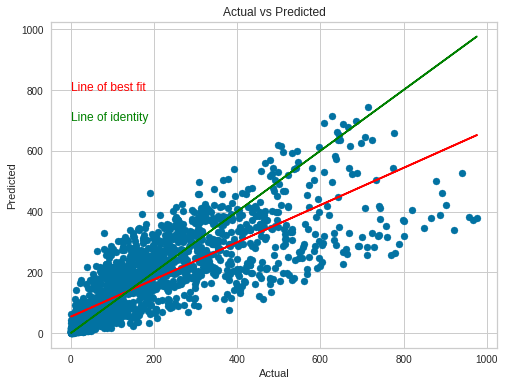

In [ ]:
#Plot predicted vs actual

plt.figure(figsize = (8, 6))
plt.scatter(unseen_predictions2['cnt'], unseen_predictions2['Pred_cnt'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
#Add line of best fit
m, b = np.polyfit(unseen_predictions2['cnt'], unseen_predictions2['Pred_cnt'], 1)
plt.plot(unseen_predictions2['cnt'], m*unseen_predictions2['cnt'] + b, color = 'red')
#Add line of identity
plt.plot(unseen_predictions2['cnt'], unseen_predictions2['cnt'], color = 'green')
#Add labels
plt.text(0, 800, 'Line of best fit', color = 'red')
plt.text(0, 700, 'Line of identity', color = 'green')
plt.show()

In [ ]:
print("Mean absolute error: ",round(mean_absolute_error(unseen_predictions2['cnt'],unseen_predictions2['Pred_cnt']),3))

Mean absolute error:  70.52


#### Splitting up the regression target to predict registered and casual users separately might make sense business-wise, depending on what the objective of city officials is. The MAE for registered users is worse than that of casual users and that can be attributed to the volume of registered users vs. casual users.
#### However, this format of prediction massively increases the MAE of **total users** and thus we attempt to build a predictive model only for <em>cnt</em> as target to see if we can bring down the MAE and improve other metrics.

## PyCaret: Predict *cnt*

In [ ]:
model = setup(

    # Basic options
    data = data,
    target = "cnt",
    train_size = 0.8,

    preprocess = True,
    
    remove_outliers = True,
    outliers_threshold = 0.05,

    ignore_features = ['instant', 'registered', 'casual', 'dteday', 'atemp', 'hr', 'mnth'],
    
    #bin_numeric_features = ['atemp', 'hum', 'windspeed'],
    
    # Feature normalization
    normalize = True,
    normalize_method = 'zscore',
    transformation = True, 
    transform_target = True,
    transform_target_method = 'yeo-johnson', #To deal with rows with value as 0

    # Dealing with collinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.8,
    remove_perfect_collinearity = True,
    
    #feature_selection = True,

    # Cross-validation settings
    data_split_shuffle = True,
    data_split_stratify = False,
    fold_strategy = 'stratifiedkfold',
    fold = 5,
    fold_shuffle = False,
    fold_groups = None,


    # Paralellization options
    n_jobs = -1,
    use_gpu = False,

    # MLFlow experiments registry
    log_experiment = True,
    experiment_name = "bike_cnt"
)

,Description,Value
0,session_id,626
1,Target,cnt
2,Original Data,"(15641, 18)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11886, 23)"


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['instant', 'registered',
                                                       'casual', 'dteday',
                                                       'atemp', 'hr', 'mnth'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='cnt',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_cat...
                ('dummy', Dummify(target='cnt')),
         

In [ ]:
models = compare_models(exclude = ['ransac'], n_select = 3, fold = 5, sort = "MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,70.9074,12377.0986,111.2322,0.6245,0.6569,0.7553,2.600
lightgbm,Light Gradient Boosting Machine,71.8465,12509.1914,111.8296,0.6205,0.6608,0.7802,0.258
xgboost,Extreme Gradient Boosting,72.7611,12925.0178,113.6708,0.6079,0.6824,0.7881,1.460
rf,Random Forest Regressor,73.4329,13201.6365,114.8852,0.5995,0.6908,0.8081,2.654
gbr,Gradient Boosting Regressor,75.1587,13526.8020,116.2913,0.5896,0.6766,0.8239,1.216
et,Extra Trees Regressor,76.0316,14428.6330,120.0919,0.5622,0.7293,0.8389,2.508
knn,K Neighbors Regressor,78.2871,14915.4282,122.1142,0.5475,0.7274,0.8676,0.384
huber,Huber Regressor,83.5613,16890.4989,129.9489,0.4876,0.7699,0.9777,0.142
br,Bayesian Ridge,84.4381,16403.2166,128.0613,0.5024,0.7781,0.9981,0.072
lar,Least Angle Regression,84.4398,16397.6481,128.0397,0.5026,0.7782,0.9973,0.114


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=626,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1e3568b10>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                

### Create

In [ ]:
model_cnt = create_model('catboost', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.55,12775.65,113.03,0.63,0.67,0.74
1,69.69,12374.18,111.24,0.62,0.64,0.71
2,71.13,12397.70,111.34,0.64,0.65,0.73
3,74.75,14084.57,118.68,0.60,0.67,0.79
4,71.04,12515.16,111.87,0.63,0.67,0.73
5,67.04,10875.62,104.29,0.65,0.65,0.79
6,67.14,10976.02,104.77,0.65,0.64,0.75
7,69.08,11473.02,107.11,0.64,0.64,0.72
8,71.89,12222.03,110.55,0.62,0.65,0.74


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=626,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1deb65f50>,
                                task_type='CPU', verbose=False)
INFO:logs:create_model() succesfully completed......................................


### Tune

In [ ]:
tuned_cnt = tune_model(model_cnt, optimize = 'MAE', fold = 10,
                      choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.4209,12778.6628,113.0427,0.6280,0.6668,0.7585
1,70.9836,12763.4319,112.9754,0.6094,0.6502,0.7397
2,70.9461,12507.4298,111.8366,0.6347,0.6574,0.7480
3,75.6246,13956.2008,118.1364,0.6001,0.6658,0.7844
4,70.6808,12305.4520,110.9299,0.6340,0.6613,0.7244
5,67.0280,10967.8967,104.7277,0.6463,0.6604,0.8066
6,67.4308,11075.8907,105.2421,0.6485,0.6480,0.7617
7,68.9867,11502.4056,107.2493,0.6361,0.6360,0.7171
8,72.3277,12256.6867,110.7099,0.6142,0.6602,0.7787


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=626,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1da6cdd90>,
                                task_type='CPU', verbose=False)
INFO:logs:tune_model() succesfully completed......................................


### Bagging

In [ ]:
bagged_cnt = ensemble_model(model_cnt, fold = 10, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.4793,12694.7953,112.6712,0.6304,0.6677,0.7495
1,70.3506,12571.1505,112.1211,0.6153,0.6459,0.7251
2,71.3379,12406.9007,111.3863,0.6376,0.6545,0.7339
3,74.8904,13992.7488,118.2909,0.5991,0.6663,0.7913
4,70.7493,12495.9929,111.7855,0.6283,0.6642,0.7284
5,67.1655,10882.6758,104.3201,0.6491,0.6550,0.7980
6,67.4791,11015.6027,104.9552,0.6504,0.6449,0.7610
7,69.0714,11512.0685,107.2943,0.6358,0.6399,0.7203
8,72.1144,12361.7770,111.1835,0.6109,0.6509,0.7574


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 6
INFO:logs:PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_state=626,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7fe1dedad450>,
                                task_type='CPU', verbose=False)
INFO:logs:ensemble_model() succesfully completed......................................


### Stacking

In [ ]:
stacked_cnt = stack_models(models, fold = 10, meta_model = model_cnt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.6609,12784.6185,113.0691,0.6278,0.6672,0.7503
1,69.6842,12419.0259,111.4407,0.6199,0.6450,0.7321
2,71.3931,12616.6713,112.3240,0.6315,0.6572,0.7256
3,75.4990,14138.8989,118.9071,0.5949,0.6710,0.8111
4,72.2969,12870.9055,113.4500,0.6172,0.6697,0.7457
5,67.6479,11069.5766,105.2121,0.6431,0.6554,0.7937
6,67.0557,10764.5594,103.7524,0.6584,0.6498,0.7697
7,69.3673,11764.8007,108.4657,0.6278,0.6421,0.7267
8,73.1487,12650.9839,112.4766,0.6018,0.6560,0.7590


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 5
INFO:logs:PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fe1da6728d0>),
                                            ('lightgbm',
                                             LGBMRegressor(boosting_type='gbdt',
                                                           class_weight=None,
                                                           colsample_bytree=1.0,
                                                           importance_type='split',
                                                           learning_rate=0.1,
                                                           max_depth=-1,
                                                           min_child_samples=20,
                                                           min_child_we

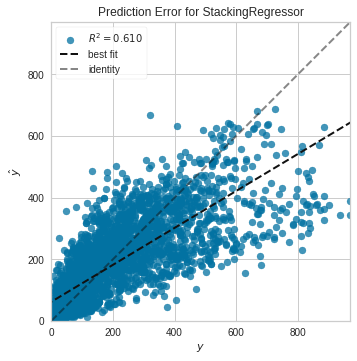

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(stacked_cnt, plot = 'error')

### Predict on unseen data

In [ ]:
fin = predict_model(stacked_cnt, data=unseen_predictions2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fe1da6728d0>),
                                            ('lightgbm',
                                             LGBMRegressor(boosting_type='gbdt',
                                                           class_weight=None,
                                                           colsample_bytree=1.0,
                                                           importance_type='split',
                                                           learning_rate=0.1,
                                                           max_depth=-1,
                                                           min_child_samples=20,
                                                           min_child_weight=0.001,
                              

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,71.829,13079.6925,114.3665,0.6248,0.6851,0.8368


In [ ]:
fin['Label'] = fin['Label'].astype('int')
fin.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,hr_cat,Pred_cas,Pred_reg,Pred_cnt,Label
0,2,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,...,0.80,0.0000,8,32,40,Late Night/Early Morning,1,11,12,13
1,6,2011-01-01,spring,2011,Jan,5,No,Sat,No,Mist,...,0.75,0.0896,0,1,1,Late Night/Early Morning,0,8,8,11
2,9,2011-01-01,spring,2011,Jan,8,No,Sat,No,Clear,...,0.75,0.0000,1,7,8,Morning,3,11,14,16
3,13,2011-01-01,spring,2011,Jan,12,No,Sat,No,Clear,...,0.77,0.2836,29,55,84,Afternoon/Evening,38,81,119,129
4,19,2011-01-01,spring,2011,Jan,18,No,Sat,No,Light Snow,...,0.88,0.2537,9,26,35,Night,5,38,43,54


In [ ]:
print("Mean absolute error (registered and casual, separated): ",round(mean_absolute_error(fin['cnt'],fin['Pred_cnt']),3))

Mean absolute error (registered and casual, separated):  70.52


In [ ]:
print("Mean absolute error (only total users): ",round(mean_absolute_error(fin['cnt'],fin['Label']),3))

Mean absolute error (only total users):  71.803


### **Conclusion** 
#### While the MAE is for predicting total users is only slightly worse than using a different predictive model for registered and casual users, this could keep flipping between the two approaches. However, the recommendation is to run two separate models as different factors influence registered users and casual users to bike in Washington D.C. 
#### More information could certainly help the model, like costs, usage of other modes of transport in the city, location of bike stations, etc.